### Predicting diabetes using logistic regression

In this notebook, I build a logistic regression model to predict whether someone has diabetes or not based on several input parameters. The data used is public and can be found here - [https://www.kaggle.com/uciml/pima-indians-diabetes-database](https://www.kaggle.com/uciml/pima-indians-diabetes-database)

### Following steps have been followed - 

1. Loading the data in this notebook (assuming we have a copy of the data as a csv)
2. Processing and cleaning it so that it can go inside the model used followed by splitting it to train and test set.
3. Building the model.
4. Analysing the output of the model and calculate the accuracy / performance of the model using test set.

In [3]:
import pandas as pd # Funcionality for performing data analysis 
import matplotlib.pyplot as plt  # Functionality to visualise our data

diabetes_data = pd.read_csv("DiabetesData.csv") # Read in a file and store it in a Pandas dataframe

In [4]:
diabetes_data.head()

,pregnant,glucose,pressure,triceps,insulin,mass,pedigree,age,diabetes
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,pos
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,neg
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,pos
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,neg
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,pos


In [6]:
diabetes_data.describe(include='all') # Show all columns regardless of type

,pregnant,glucose,pressure,triceps,insulin,mass,pedigree,age,diabetes
count,768.000000,763.000000,733.000000,541.000000,394.000000,757.000000,768.000000,768.000000,768
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,neg
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,500
mean,3.845052,121.686763,72.405184,29.153420,155.548223,32.457464,0.471876,33.240885,NaN
std,3.369578,30.535641,12.382158,10.476982,118.775855,6.924988,0.331329,11.760232,NaN
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,NaN
25%,1.000000,99.000000,64.000000,22.000000,76.250000,27.500000,0.243750,24.000000,NaN
50%,3.000000,117.000000,72.000000,29.000000,125.000000,32.300000,0.372500,29.000000,NaN
75%,6.000000,141.000000,80.000000,36.000000,190.000000,36.600000,0.626250,41.000000,NaN


In [7]:
diabetes_data.info()  # What is happening under the hood, i.e. information about the dataframe itself

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pregnant  768 non-null    int64  
 1   glucose   763 non-null    float64
 2   pressure  733 non-null    float64
 3   triceps   541 non-null    float64
 4   insulin   394 non-null    float64
 5   mass      757 non-null    float64
 6   pedigree  768 non-null    float64
 7   age       768 non-null    int64  
 8   diabetes  768 non-null    object 
dtypes: float64(6), int64(2), object(1)
memory usage: 54.1+ KB


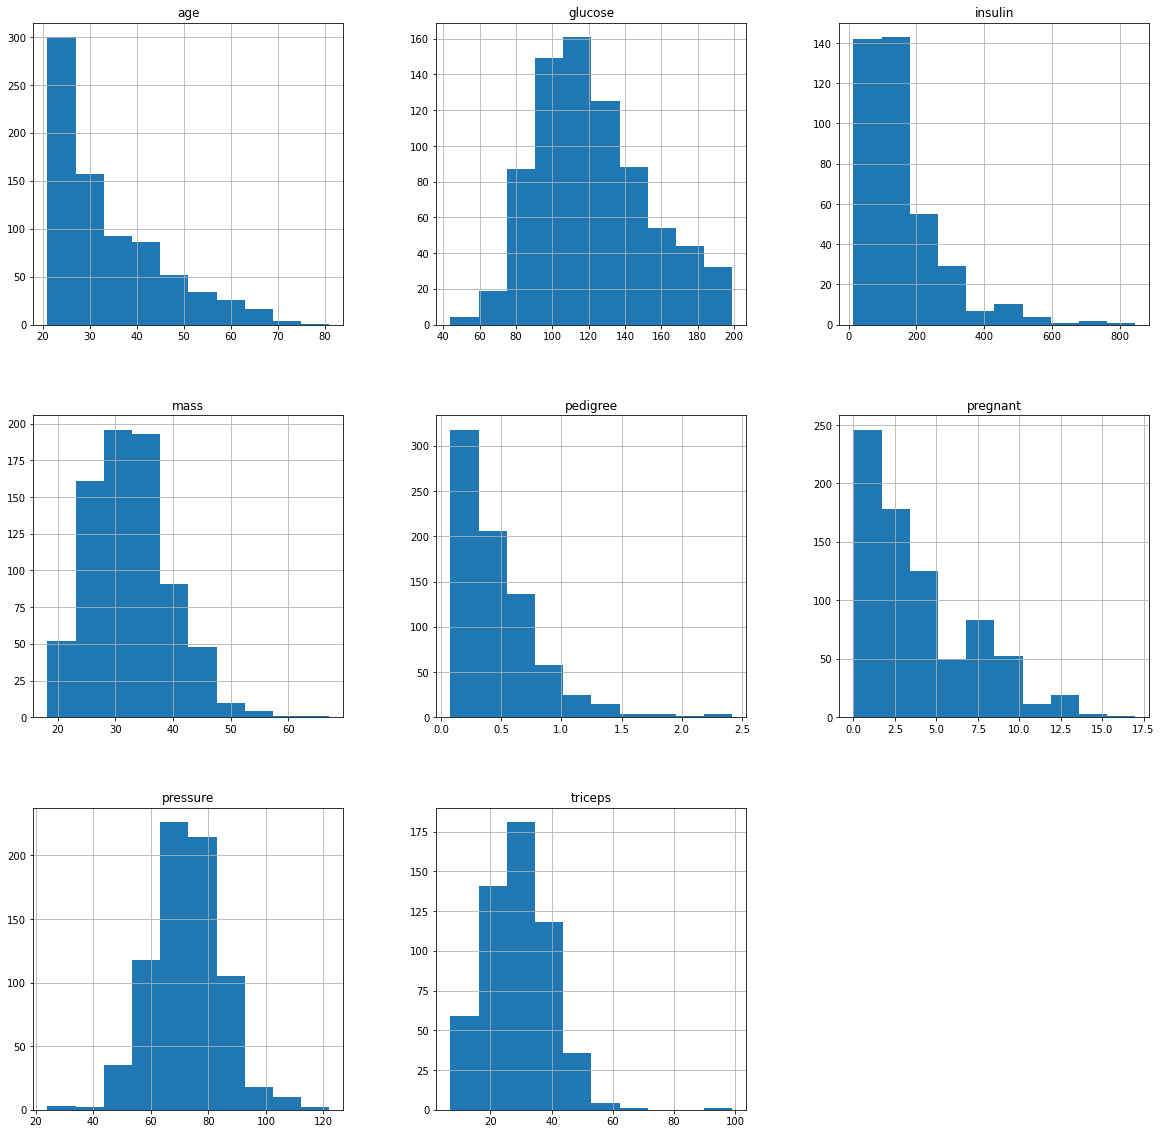

In [8]:
diabetes_data.hist(figsize=(20,20))  
plt.show()

In [21]:
# Next we wish to perform classification.

print(diabetes_data.columns) # The eighth column entitled "diabetes" is the outcome we wish to predict

cleaned_diabetes_data = diabetes_data.fillna(0)
x = cleaned_diabetes_data.drop('diabetes',1) # column = 1, row = 0 # returns a copy
y = cleaned_diabetes_data['diabetes'].copy() # make a fresh copy of the column that contains our response

# Split into train/test subsets
# The following hard-codes the split which uses the last 700 rows to build a model

x_train = x[(len(x.index) - 700):len(x.index)] # note the index rows 68 to 768 are selected
x_test = x[0:(len(x.index) - 700)] # rows 68 up to the end


y_train = y[(len(x.index) - 700):len(x.index)]
y_test = y[0:(len(x.index) - 700)] 

# Note these slices all need to correspond. Furthermore we may wish to split using different rows.

Index(['pregnant', 'glucose', 'pressure', 'triceps', 'insulin', 'mass',
       'pedigree', 'age', 'diabetes'],
      dtype='object')


In [29]:
# To perform classification using logistic regression.  

from sklearn.linear_model import LogisticRegression

# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
# There are numerous ways to perform the optimisation step. We shall use liblinear. But note that this perform regularization. 
log_reg = LogisticRegression(solver='liblinear') 


#Lets build a model
log_reg.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [30]:
y_predict = log_reg.predict(x_test)

# Note: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
# The underlying C implementation uses a random number generator to select features when fitting the model. 
# It is thus not uncommon, to have slightly different results for the same input data. 
# If that happens, try with a smaller tol parameter.
log_reg.score(x_test, y_test)

0.6764705882352942

In [20]:
# Similar result to R but there is no ability to obtain the significance or otherwise of the model.
# We can view the coefficents of the model

# Perhaps print using f strings
print(f"Coefficients = {log_reg.coef_} \n\nIntercepts={log_reg.intercept_}")

Coefficients = [[ 0.1232537   0.02921841 -0.01789112 -0.00359208 -0.00088037  0.06516071
   0.79151181  0.00374585]] 

Intercepts=[-5.9698138]


### We repeat the above process after removing the column - "triceps" from the training data and then comparing the results.

In [43]:
filtered_diabetes_data = cleaned_diabetes_data.drop('triceps',1)

In [42]:
# Next we wish to perform classification.

print(filtered_diabetes_data.columns) # The eighth column entitled "diabetes" is the outcome we wish to predict

x = filtered_diabetes_data.drop('diabetes',1) # column = 1, row = 0 # returns a copy
y = filtered_diabetes_data['diabetes'].copy() # make a fresh copy of the column that contains our response

# Split into train/test subsets
# The following hard-codes the split which uses the last 700 rows to build a model

x_train = x[(len(x.index) - 700):len(x.index)] # note the index rows 68 to 768 are selected
x_test = x[0:(len(x.index) - 700)] # rows 68 up to the end


y_train = y[(len(x.index) - 700):len(x.index)]
y_test = y[0:(len(x.index) - 700)] 

# Note these slices all need to correspond. Furthermore we may wish to split using different rows.

Index(['pregnant', 'glucose', 'pressure', 'insulin', 'mass', 'pedigree', 'age',
       'diabetes'],
      dtype='object')


In [38]:
# To perform classification using logistic regression.  

from sklearn.linear_model import LogisticRegression

# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
# There are numerous ways to perform the optimisation step. We shall use liblinear. But note that this perform regularization. 
log_reg = LogisticRegression(solver='liblinear') 


#Lets build a model
log_reg.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [39]:
y_predict = log_reg.predict(x_test)

# Note: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
# The underlying C implementation uses a random number generator to select features when fitting the model. 
# It is thus not uncommon, to have slightly different results for the same input data. 
# If that happens, try with a smaller tol parameter.
log_reg.score(x_test, y_test)

0.6764705882352942

### Summary

The above result suggests that removing the column triceps had little / no effect on the accuracy of the model.

In [40]:
# Similar result to R but there is no ability to obtain the significance or otherwise of the model.
# We can view the coefficents of the model

# Perhaps print using f strings
print(f"Coefficients = {log_reg.coef_} \n\nIntercepts={log_reg.intercept_}")

Coefficients = [[ 0.12325067  0.02945184 -0.01831371 -0.00107529  0.0629126   0.77904541
   0.00416614]] 

Intercepts=[-5.96243524]


### We repeat the above process after removing the columns that have atleast a single NA value.

In [49]:
no_na_diabetes_data = diabetes_data.dropna(axis='columns')

In [50]:
no_na_diabetes_data.head()

,pregnant,pedigree,age,diabetes
0,6,0.627,50,pos
1,1,0.351,31,neg
2,8,0.672,32,pos
3,1,0.167,21,neg
4,0,2.288,33,pos


In [51]:
no_na_diabetes_data.info()  # What is happening under the hood, i.e. information about the dataframe itself

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pregnant  768 non-null    int64  
 1   pedigree  768 non-null    float64
 2   age       768 non-null    int64  
 3   diabetes  768 non-null    object 
dtypes: float64(1), int64(2), object(1)
memory usage: 24.1+ KB


In [52]:
# Next we wish to perform classification.

print(no_na_diabetes_data.columns) # The eighth column entitled "diabetes" is the outcome we wish to predict

x = no_na_diabetes_data.drop('diabetes',1) # column = 1, row = 0 # returns a copy
y = no_na_diabetes_data['diabetes'].copy() # make a fresh copy of the column that contains our response

# Split into train/test subsets
# The following hard-codes the split which uses the last 700 rows to build a model

x_train = x[(len(x.index) - 700):len(x.index)] # note the index rows 68 to 768 are selected
x_test = x[0:(len(x.index) - 700)] # rows 68 up to the end


y_train = y[(len(x.index) - 700):len(x.index)]
y_test = y[0:(len(x.index) - 700)] 

# Note these slices all need to correspond. Furthermore we may wish to split using different rows.

Index(['pregnant', 'pedigree', 'age', 'diabetes'], dtype='object')


In [53]:
# To perform classification using logistic regression.  

from sklearn.linear_model import LogisticRegression

# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
# There are numerous ways to perform the optimisation step. We shall use liblinear. But note that this perform regularization. 
log_reg = LogisticRegression(solver='liblinear') 


#Lets build a model
log_reg.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [54]:
y_predict = log_reg.predict(x_test)

# Note: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
# The underlying C implementation uses a random number generator to select features when fitting the model. 
# It is thus not uncommon, to have slightly different results for the same input data. 
# If that happens, try with a smaller tol parameter.
log_reg.score(x_test, y_test)

0.5588235294117647

In [55]:
# Similar result to R but there is no ability to obtain the significance or otherwise of the model.
# We can view the coefficents of the model

# Perhaps print using f strings
print(f"Coefficients = {log_reg.coef_} \n\nIntercepts={log_reg.intercept_}")

Coefficients = [[0.09391456 1.05568132 0.02289256]] 

Intercepts=[-2.29301249]


### Summary

The above result suggests that even though the columns had missing data, because the accuracy went down from 67.64% to 55.88%, there were some useful information in them that was not worth getting rid of.